## Construct the EDA report for your dataset.
#### ▪ Students with mod( ID_last_two_digits, 2) = 0 will use Boston Housing Data
#### ▪ Students with mod( ID_last_two_digits, 2) = 1 will use Wine Quality Data.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stm
import os
%matplotlib inline


In [3]:
# X is the two last digits of my ID
X=67
mod=X%2
# Found the mod value is 1 So my selected data set is Wine Quality Data Set:


## 1. Illustrate the following summary information in Python:
#### (i) Read the data and construct some appropriate graphs for each of the variables with interpretation.

In [43]:
df=pd.read_csv("winequality-white.csv",delimiter=";")
df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### Add Four rows in dataframe

In [44]:


datarowsSeries = [pd.Series([7.8,.88,0.00,1.9,0.09,25.0,67.0,.991,3.22,0.68,9.8,5], index=df.columns ),
pd.Series([7.2,.83,0.01,2.2,0.19,15.0,60.0,.996,3.52,0.55,9.6,6], index=df.columns ),
pd.Series([7.9,.89,0.01,1.7,0.08,22.0,57.0,.997,3.26,0.64,9.8,2], index=df.columns ),
pd.Series([7.7,.86,0.02,2.3,0.07,11.0,38.0,.994,3.12,0.08,9.4,3], index=df.columns ) ]

nds=pd.DataFrame(datarowsSeries)

# dotX is the two last digits of my ID with decimal point 
dotX=.67

for item in nds:
   nds[item]=nds[item]+dotX

# Append the data set to main data set 
df_white=df.append(nds,ignore_index=True)

 

C:\Users\sobuj\AppData\Local\Temp\ipykernel_41248\3423968720.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_white=df.append(nds,ignore_index=True)


##### Graph

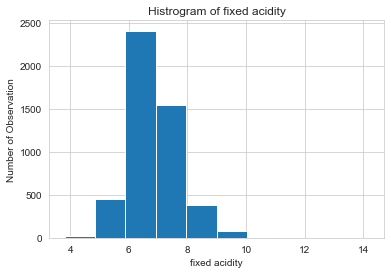

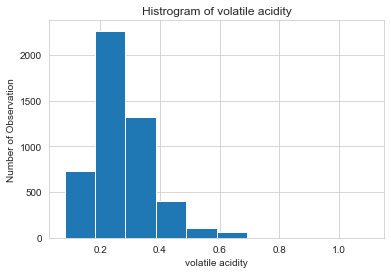

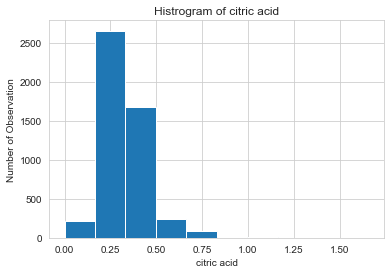

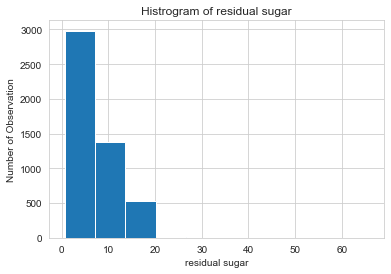

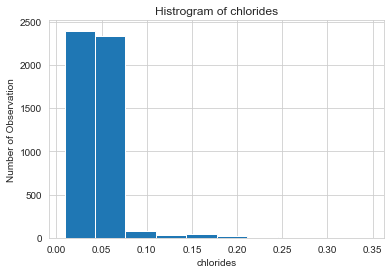

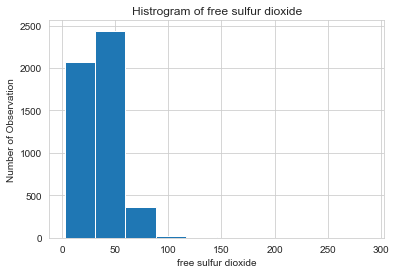

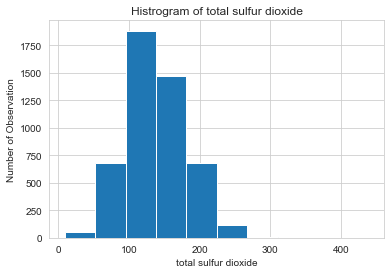

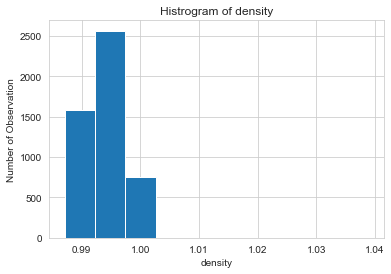

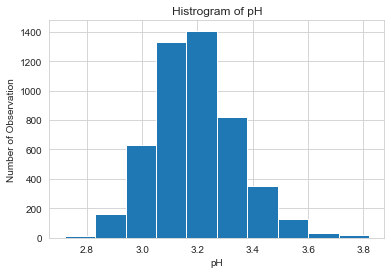

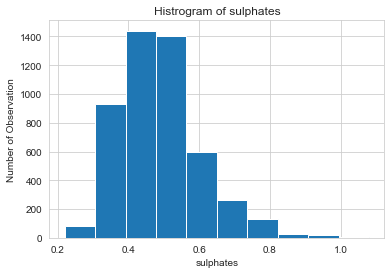

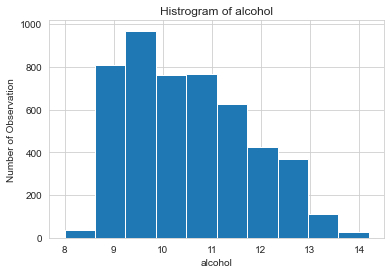

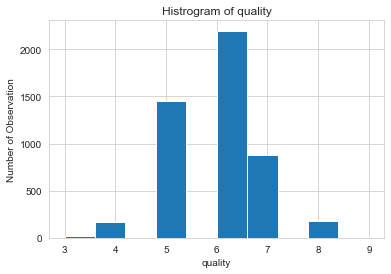

In [30]:

for col in df.columns:
    plt.hist(df[col],bins=10)
    plt.xlabel(col)
    plt.ylabel('Number of Observation')
    plt.title('Histrogram of '+ col)
    plt.show()


#### (ii) Calculate some measures (if appropriate), for instance, mean, median, mode, minimum, maximum, quartiles, Standard deviation, etc., for each of the variables according to their level of measurements. Also, calculate ovariance matrix and correlation-matrix of the variables.

In [39]:
##  Calculate some measures (if appropriate), for instance, mean, median, mode, minimum, maximum, quartiles, Standard deviation for each of the variables according to their level of measurements
df_white.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4902.0,6.855983,0.844596,3.80000,6.30000,6.80000,7.3000,14.200
volatile acidity,4902.0,0.279267,0.106957,0.08000,0.21000,0.26000,0.3200,1.560
citric acid,4902.0,0.334474,0.121373,0.00000,0.27000,0.32000,0.3900,1.660
residual sugar,4902.0,6.388399,5.071091,0.60000,1.70000,5.20000,9.9000,65.800
chlorides,4902.0,0.046369,0.030257,0.00900,0.03600,0.04300,0.0500,0.860
free sulfur dioxide,4902.0,35.294712,17.007372,2.00000,23.00000,34.00000,46.0000,289.000
total sulfur dioxide,4902.0,138.293590,42.546615,9.00000,108.00000,134.00000,167.0000,440.000
density,4902.0,0.994574,0.019379,0.98711,0.99173,0.99375,0.9961,1.667
pH,4902.0,3.188888,0.152557,2.72000,3.09000,3.18000,3.2800,4.190
sulphates,4902.0,0.490392,0.115864,0.22000,0.41000,0.47000,0.5500,1.350


In [40]:
df_white.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6.0


In [38]:
df_white.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6.0


In [10]:
# covariance matrix
df_white.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,4.459758,3.734717,3.715786,3.843474,3.708029,2.053400,2.386303,3.704897,3.655026,3.702426,3.531003,3.515235
volatile acidity,3.734717,3.735304,3.673122,3.484985,3.696369,2.586534,-0.492115,3.692846,3.697381,3.692273,3.653571,3.571919
citric acid,3.715786,3.673122,3.640046,3.463404,3.646698,2.908971,-0.239982,3.643119,3.645037,3.643771,3.584776,3.539940
residual sugar,3.843474,3.484985,3.463404,28.903975,3.435155,28.329476,85.649346,3.434921,3.278306,3.406602,0.567561,2.888425
chlorides,3.708029,3.696369,3.646698,3.435155,3.667980,2.768845,-0.682698,3.664168,3.668849,3.664041,3.607183,3.557415
free sulfur dioxide,2.053400,2.586534,2.908971,28.329476,2.768845,291.065699,443.896737,2.743701,2.730862,2.844423,-2.535980,2.775027
total sulfur dioxide,2.386303,-0.492115,-0.239982,85.649346,-0.682698,443.896737,1804.910645,-0.799309,-0.852256,-0.212443,-24.311617,-7.406544
density,3.704897,3.692846,3.643119,3.434921,3.664168,2.743701,-0.799309,3.660813,3.665748,3.660676,3.610687,3.557358
pH,3.655026,3.697381,3.645037,3.278306,3.668849,2.730862,-0.852256,3.665748,3.693584,3.668335,3.641028,3.576431
sulphates,3.702426,3.692273,3.643771,3.406602,3.664041,2.844423,-0.212443,3.660676,3.668335,3.673557,3.610988,3.563529


In [11]:
# correlation-matrix
df_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.915038,0.922235,0.338524,0.916799,0.056993,0.026598,0.916920,0.900556,0.914718,0.741831,0.807983
volatile acidity,0.915038,1.000000,0.996137,0.335397,0.998617,0.078444,-0.005993,0.998641,0.995422,0.996753,0.838720,0.897103
citric acid,0.922235,0.996137,1.000000,0.337653,0.998005,0.089370,-0.002961,0.998001,0.994087,0.996447,0.833626,0.900629
residual sugar,0.338524,0.335397,0.337653,1.000000,0.333622,0.308862,0.374988,0.333925,0.317283,0.330597,0.046838,0.260787
chlorides,0.916799,0.998617,0.998005,0.333622,1.000000,0.084740,-0.008390,0.999938,0.996764,0.998168,0.835636,0.901622
free sulfur dioxide,0.056993,0.078444,0.089370,0.308862,0.084740,1.000000,0.612433,0.084053,0.083288,0.086987,-0.065950,0.078954
total sulfur dioxide,0.026598,-0.005993,-0.002961,0.374988,-0.008390,0.612433,1.000000,-0.009833,-0.010438,-0.002609,-0.253892,-0.084624
density,0.916920,0.998641,0.998001,0.333925,0.999938,0.084053,-0.009833,1.000000,0.996896,0.998226,0.837266,0.902490
pH,0.900556,0.995422,0.994087,0.317283,0.996764,0.083288,-0.010438,0.996896,1.000000,0.995868,0.840548,0.903294
sulphates,0.914718,0.996753,0.996447,0.330597,0.998168,0.086987,-0.002609,0.998226,0.995868,1.000000,0.835882,0.902486


#### (iii) Construct the pair plots of those variables with different colors for different wine qualities (Good >5, Bad<=5) in Wine Quality Data.


In [2]:
# Good=Quality>5 and Bad=Quality<=5, defining 2 and 1 respectively
quality_df=df_white
 
quality_df['quality']=np.where(quality_df['quality']>5,1,2)
# # quality_df=quality_df.map({1:'Bad',2:'Good'})
# quality_df['quality']
# plt.figure(figsize = (12,6))
# sns.set_style('whitegrid')
# sns.pairplot(df_white,hue = 'quality', height = 4)
# plt.show()

NameError: name 'df_white' is not defined

# Data Preprocessing

In [13]:
x=df.drop(['quality'], axis=1)
y=df['quality']

In [14]:
from imblearn.over_sampling import SMOTE
osample=SMOTE()
x_res,y_res=osample.fit_resample(x,y)



ModuleNotFoundError: No module named 'imblearn'

# Feature Engineering & Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(
    x_res,y_res,test_size=0.2,random_state=0
)